<a href="https://colab.research.google.com/github/Rodrigo-Lopes-de-Andrade/Artigos_e_Projetos/blob/main/Sistema_Classifica%C3%A7%C3%A3o_Risco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left">
    <a href="https://medium.com/rodrigo-lopesandrade" alt="Contributors">
        <img src="https://img.shields.io/badge/Medium-RLA Data Science-magenta" />
    </a>
<a href="https://linkedin.com/in/rodrigo-lopes-de-andrade-51753246" alt="Contributors">
        <img src="https://img.shields.io/badge/Linkedin-Rodrigo Lopes de Andrade-cyan" />
    </a>
<a href="https://github.com/Rodrigo-Lopes-de-Andrade" alt="Contributors">
        <img src="https://img.shields.io/badge/GitHub-Rodrigo Lopes de Andrade-purple" />
    </a>
<p align="left">
  <img src="https://raw.githubusercontent.com/Rodrigo-Lopes-de-Andrade/Portifolio_Rodrigo_Andrade/main/LOGORLA.JPG" >
</p>


# <font color='Purple'>Classificação de Risco</font>

### <font color='GREY'> Sistema de Classificação de Risco para Concessão de Empréstimo </font>  




##<font color=''>Entendendo o Problema de Negócio</font>

Nesse caso prático, nós precisamos construir um Sistema de classificação de Risco do cliente para aprovação de empréstimos.


##### **Fonte dos Dados**

Usaremos a base de dados "**risco.csv**" originada por meio dos dados da **UCI Machine Learning**.

 Nesse portal a gente consegue realizar o download de vários datasets reais de empresas de todo o Mundo.

**Link**:

https://archive.ics.uci.edu/ml/index.php

###### **Arquitetura dos Dados** (AD)

* **id_cliente**  : Número de identificação única do cliente
* **inad**        : Índice de inadimplência do cliente
* **Saldo_contas**: Índice referente aos saldos das contas corrente, poupança e aplicações do cliente
* **Class_Renda** : Índice referente à classificação do cliente de acordo com sua renda.
* **Anotações**   : Índice referente às anotações externas à empresa, tais como anotações SERASA / SPC / BACEN 
* **Risco**       : Risco do Cliente atribuído dadas as variáveis de análise do cliente

# 2° Análise Exploratória dos Dados


In [38]:
# Importando Bibliotecas Essenciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline
import missingno as msno

In [39]:
# bibliotecas para trabalhar offline com a biblioteca
import plotly
import plotly.offline as py
import plotly.graph_objs as go # criará de fato os gráficos
from plotly.offline import plot, iplot
from plotly.subplots import make_subplots
import cufflinks as cf # para conectar o plotly ao pandas
cf.go_offline()
plotly.offline.init_notebook_mode(connected = True)
import plotly.io as pio
pio.renderers
pio.renderers.default = 'colab' #Como estamos no ambiente colab escolheremos o renderers = 'colab'.

In [40]:
# Exibindo a Sequential Color scales
import plotly.express as px
fig = px.colors.sequential.swatches()
fig.update_layout(width = 990 , height = 1760)
fig.show()


In [41]:
# Escolhendo as paletas de cores
import plotly.express as px
print(px.colors.sequential.Plotly3)

['#0508b8', '#1910d8', '#3c19f0', '#6b1cfb', '#981cfd', '#bf1cfd', '#dd2bfd', '#f246fe', '#fc67fd', '#fe88fc', '#fea5fd', '#febefe', '#fec3fe']


In [42]:
# Criando a Paleta de cores do Plotly
colors = ['#F06E5C','#5CF0C5','#F1F689','#F0B35C','#6EDEDE',
          '#BB81D5','#D3D972','#EB83EE','#8B8CED','#F09674',
          '#BCE374','#72C3E7','#C3A0EB','#E6809D','#A9BFCB']

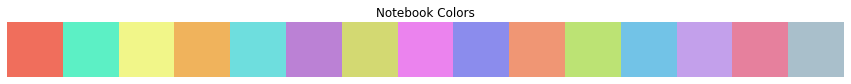

In [43]:
# Criando a paleta de cores para o Seaborn
sns.palplot(sns.color_palette(colors))
plt.title('Notebook Colors', size = 12)
plt.axis('off')
plt.show()

In [44]:
# Se conectando com os dados - Nesse caso, a Fonte de Dados é um Arquivo
df = pd.read_csv('https://raw.githubusercontent.com/Rodrigo-Lopes-de-Andrade/Datasets/main/risco.csv')

In [45]:
# Overview do DataSet
def check_df(dataframe, head=5):
    
    print(" SHAPE ".center(50,'★'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(50,'★'))
    print(dataframe.dtypes)
    print(" HEAD ".center(50,'★'))
    print(dataframe.head(head))
    print(' TAIL '.center(50,'★'))
    print(dataframe.tail(head))
    print(' MISSING VALUES '.center(50,'★'))
    print(dataframe.isnull().sum())
    print(' DUPLICATED VALUES '.center(50,'★'))
    print(dataframe.duplicated().sum())
    print(" QUANTILES ".center(50,'★'))
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

★★★★★★★★★★★★★★★★★★★★★ SHAPE ★★★★★★★★★★★★★★★★★★★★★★
Rows: 150
Columns: 6
★★★★★★★★★★★★★★★★★★★★★ TYPES ★★★★★★★★★★★★★★★★★★★★★★
id_cliente           int64
anot_cadastrais    float64
indice_inad        float64
class_renda        float64
saldo_contas       float64
Risco               object
dtype: object
★★★★★★★★★★★★★★★★★★★★★★ HEAD ★★★★★★★★★★★★★★★★★★★★★★
   id_cliente  anot_cadastrais  ...  saldo_contas       Risco
0           0              5.1  ...           0.2  Risco_Alto
1           1              4.9  ...           0.2  Risco_Alto
2           2              4.7  ...           0.2  Risco_Alto
3           3              4.6  ...           0.2  Risco_Alto
4           4              5.0  ...           0.2  Risco_Alto

[5 rows x 6 columns]
★★★★★★★★★★★★★★★★★★★★★★ TAIL ★★★★★★★★★★★★★★★★★★★★★★
     id_cliente  anot_cadastrais  ...  saldo_contas        Risco
145         145              6.7  ...           2.3  Risco_Baixo
146         146              6.3  ...           1.9  Risco_Baixo
147       

In [46]:
# Imprime na Tela os primeiros registros
df.head()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,0,5.1,3.5,1.4,0.2,Risco_Alto
1,1,4.9,3.0,1.4,0.2,Risco_Alto
2,2,4.7,3.2,1.3,0.2,Risco_Alto
3,3,4.6,3.1,1.5,0.2,Risco_Alto
4,4,5.0,3.6,1.4,0.2,Risco_Alto


In [47]:
# Informações do Dataset - Tipo das Variáveis, Quantidade de linhas (registros) e colunas (variáveis/features)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_cliente       150 non-null    int64  
 1   anot_cadastrais  150 non-null    float64
 2   indice_inad      150 non-null    float64
 3   class_renda      150 non-null    float64
 4   saldo_contas     150 non-null    float64
 5   Risco            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [48]:
#Verifica as dimensões do dataset (antes de vírgula são linhas    ,     depois da vírgula são colunas)
df.shape

(150, 6)

In [49]:
# Cria uma função para imprimir na tela o resultado da função SHAPE
print(f"Dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.")

Dataset tem 150 linhas e 6 colunas.


In [50]:
#Eliminar a coluna de identificação, pois ela não é variável explicativa, é somente a identificação do cliente7
df = df.drop(columns='id_cliente')

In [51]:
#Estatísticas descritivas das variáveis numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
anot_cadastrais,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
indice_inad,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
class_renda,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
saldo_contas,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [96]:
# Verificando os tipos de variáveis
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 150
Variables: 5
cat_cols: 1
num_cols: 4
cat_but_car: 0
num_but_cat: 0


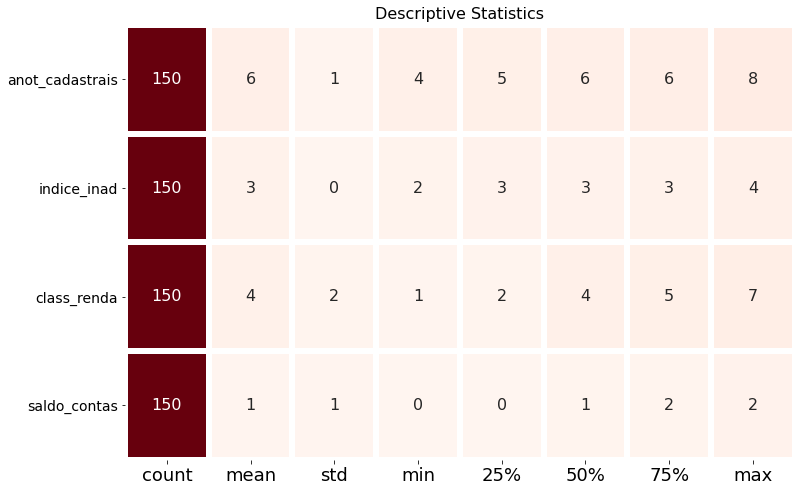

In [52]:
def desc_stats(dataframe):
  
    desc = df.describe().T
    desc_df = pd.DataFrame(index= [col for col in df.columns if df[col].dtype != 'O'], 
                   columns= df.describe().T.columns.tolist(),data= desc )

    f,ax = plt.subplots(figsize=(12,8))
    sns.heatmap(desc_df, annot=True,cmap = "Reds", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,
            annot_kws={"size": 16})

    plt.xticks(size = 18)
    plt.yticks(size = 14, rotation = 0)
    plt.title("Descriptive Statistics", size = 16)
    plt.show()

desc_stats(df)

In [53]:
# Tabela de Frequência da Variável "risco" - Nossa Classe ou Label ou Target
df['Risco'].value_counts()


Risco_Baixo    50
Risco_Medio    50
Risco_Alto     50
Name: Risco, dtype: int64

In [54]:
# Forma adicional de criar a Tab. de Frequência
df.Risco.value_counts()

Risco_Baixo    50
Risco_Medio    50
Risco_Alto     50
Name: Risco, dtype: int64

In [55]:
# Análise da Variável Target 

fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])

fig.add_trace(go.Bar( y = df['Risco'].value_counts().values.tolist(), 
                      x = df['Risco'].value_counts().index, 
                      text=df['Risco'].value_counts().values.tolist(),
                      textfont=dict(size=15),
                      name = 'Risco',
                      textposition = 'auto',
                      showlegend=False,
                      marker=dict(color = colors,
                                  line=dict(color='white',
                                            width=1.5))),
              row = 1, col = 1)

fig.add_trace(go.Pie(labels=df['Risco'].value_counts().keys(),
                     values=df['Risco'].value_counts().values,
                     textfont = dict(size = 16),
                     textposition='auto',
                     showlegend = False,
                     name = 'Risco',
                     marker=dict(colors = colors)),
              row = 1, col = 2)

fig.update_layout(title={'text': 'Risco',
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')

iplot(fig)

In [56]:
# Check for missing values
df.isna().sum()

anot_cadastrais    0
indice_inad        0
class_renda        0
saldo_contas       0
Risco              0
dtype: int64

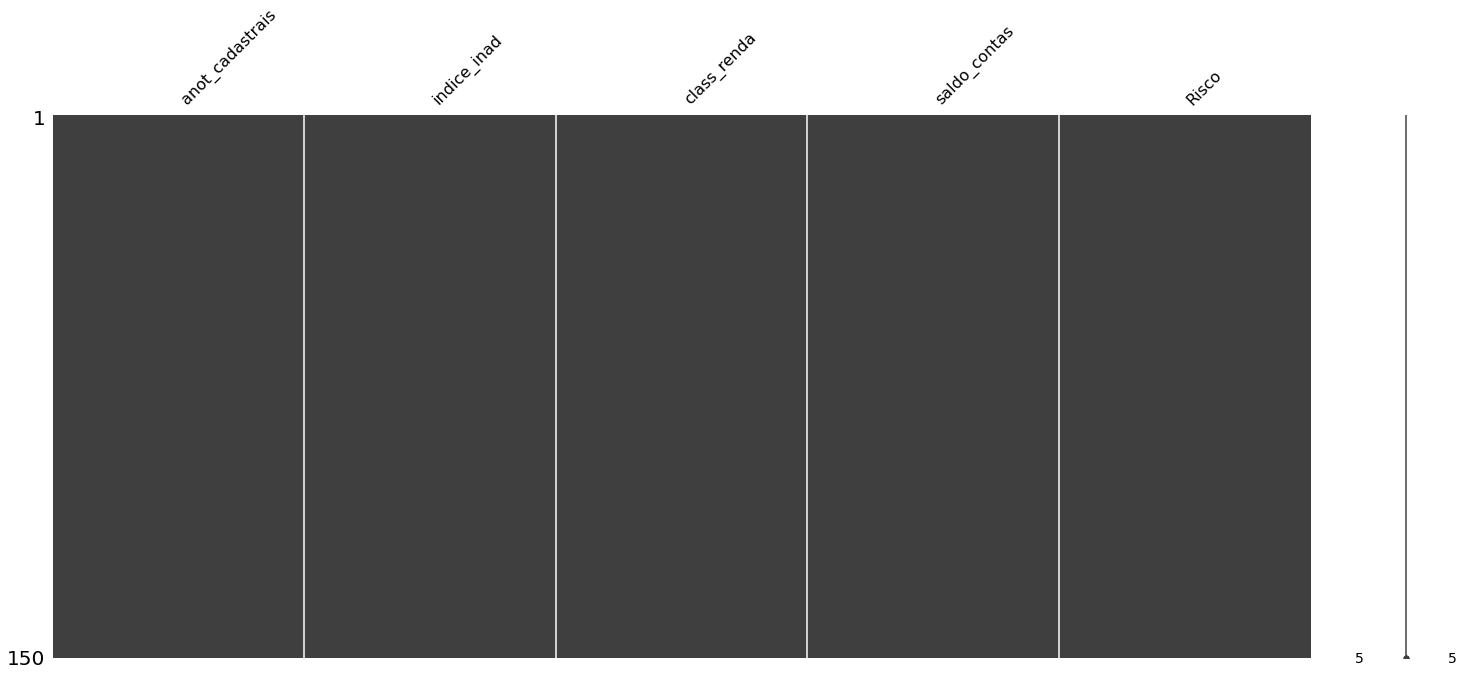

In [57]:
msno.matrix(df, fontsize = 16)
plt.show()

In [60]:
# Análise das variaveis numéricas
def num_summary(dataframe, col_name):
    fig = make_subplots(rows=1,cols=2,
                        subplot_titles=('Extremos e quartis','Distribuição'))

    fig.add_trace(go.Box(y=dataframe[col_name],
                         name = str(col_name),
                         showlegend = False,
                         marker_color = colors[1]),
                  row = 1, col = 1)
    
    fig.add_trace(go.Histogram(x = dataframe[col_name],
                               xbins = dict(start = 0,end = dataframe[col_name].max()),
                               showlegend = False,
                               name = str(col_name),
                               marker=dict(color=colors[0],
                                           line=dict(color='white',
                                                     width=2))),
                  row = 1, col = 2)
    
    fig.update_layout(title={'text': str(col_name),
                             'y':0.9,
                             'x':0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='ggplot2')
    
    iplot(fig)

for i in num_cols:
    num_summary(df,i)

In [61]:

index_vals = [colors[0] if i == 0 else colors[1] for i in df['Risco'].astype('category').cat.codes]

fig = go.Figure(data=go.Splom(dimensions=[dict(label='anot_cadastrais',values=df['anot_cadastrais']),
                                          dict(label='indice_inad',values=df['indice_inad']),
                                          dict(label='class_renda',values=df['class_renda']),
                                          dict(label='saldo_contas',values=df['saldo_contas'])],
                showupperhalf=True, 
                text=df['Risco'],
                marker=dict(color = index_vals,
                            showscale = False,
                            line_color = 'white',
                            line_width = 1)))

fig.update_layout(title='Diagrama de dispersão bivariado',
                  width=950,
                  height=950,
                  template = 'ggplot2')

iplot(fig)

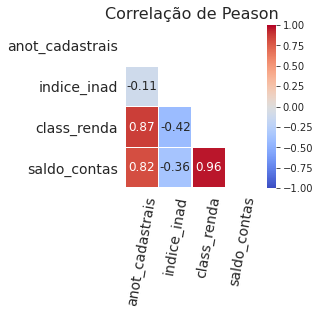

In [62]:
def pearson_corr(dataframe):
    sns.set_style("white")
    matrix = np.triu(df.corr(method="pearson"))
    f,ax=plt.subplots(figsize = (matrix.shape[0]*0.75,
                                 matrix.shape[1]*0.75))
    sns.heatmap(df.corr(method="pearson"),
                annot= True,
                fmt = ".2f",
                ax=ax,
                vmin = -1,
                vmax = 1,
                mask = matrix,
                cmap = "coolwarm",
                linewidth = 0.4,
                linecolor = "white",
                annot_kws={"size": 12})
    plt.xticks(rotation=80,size=14)
    plt.yticks(rotation=0,size=14)
    plt.title('Correlação de Peason', size = 16)
    plt.show()
    
pearson_corr(df)

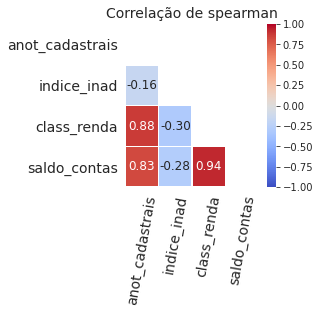

In [63]:
def spearman_corr(dataframe):
    sns.set_style("white")
    matrix = np.triu(df.corr(method="spearman"))
    f,ax=plt.subplots(figsize = (matrix.shape[0]*0.75,
                                 matrix.shape[1]*0.75))
    sns.heatmap(df.corr(method = "spearman"),
                annot= True,
                fmt = ".2f",
                ax=ax,
                vmin = -1,
                vmax = 1,
                mask = matrix,
                cmap = "coolwarm",
                linewidth = 0.4,
                linecolor = "white",
                annot_kws={"size": 12})
    plt.xticks(rotation=80,size=14)
    plt.yticks(rotation=0,size=14)
    plt.title('Correlação de spearman', size = 14)
    plt.show()
    
spearman_corr(df)

# 3° Pré-Processamento dos Dados

In [64]:
#3 Separando as Variáveis de Entrada e Saída do Modelo
X = df.iloc[:,:-1].values  #variáveis independentes
y = df.iloc[:,-1].values  #Target/labe/class/vairável dependente

In [65]:
#Print das variáveis X e Y
print("\nVariáveis de Entrada da avaliação:\n\n", X[:3])
print("\nRisco - Variável a ser Predita :\n\n", y[:3])


Variáveis de Entrada da avaliação:

 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]

Risco - Variável a ser Predita :

 ['Risco_Alto' 'Risco_Alto' 'Risco_Alto']


In [66]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [67]:
y

array(['Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Medio', 'Risco_Medio',
       'Risco_Medio', 'Risco_Medio', 'Risco_Medio', 'Risco_Medio',
       'Risco_Medio', 'Risco_Medio', 'Risco_Medio', 'Risco_Medio',
       'Risco_Medio', 'Risco_Medio', 'Risco_M

### Separando os dados entre Treino e Teste

In [68]:
#Divide o dataset em Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.2, random_state = 7) 

In [69]:
print("Dados de Treino :\n----------------\n")
print("X = \n", X_train[:2])
print("y = \n", y_train[:2])

print("\n\nDados de Teste :\n----------------\n")
print("X = \n",X_test[:2])
print("y = \n", y_test[:2])

Dados de Treino :
----------------

X = 
 [[6.2 2.8 4.8 1.8]
 [5.7 2.6 3.5 1. ]]
y = 
 ['Risco_Baixo' 'Risco_Medio']


Dados de Teste :
----------------

X = 
 [[5.9 3.  5.1 1.8]
 [5.4 3.  4.5 1.5]]
y = 
 ['Risco_Baixo' 'Risco_Medio']


In [70]:
print(f"Shape dos dados de treino é {X_train.shape}")
print(f"Shape dos dados de teste é {X_test.shape}")

Shape dos dados de treino é (120, 4)
Shape dos dados de teste é (30, 4)


### Padronizando as Features - As variáveis explicativas (variáveis de entrada)


In [71]:
## Teste para normalização Shapiro-Wilks 
from scipy.stats import shapiro,levene
data = go.Bar(y = [var for var in df[num_cols].columns],
              x = [round(shapiro(df[var])[0],3) for var in df[num_cols].columns],
              text =['p-value: ' + str(round(shapiro(df[var])[1],3)) for var in df[num_cols].columns],
              orientation='h',
              textposition= 'inside',marker = dict(color = colors,
                                                   line_color = 'white',
                                                   line_width=2))
layout = go.Layout(title=dict(text='Shapiro-Wilks Test for Normality',
                              y=0.9,
                              x=0.5,
                              xanchor= 'center',
                              yanchor= 'top'),
                   xaxis = dict(title='Test Stats'),
                   template='ggplot2')

fig=go.Figure(data=data, layout=layout)
iplot(fig)

In [72]:
#Teste de Levene para homogeneidade de variância
from scipy.stats import shapiro,levene
stat, p = levene(df["anot_cadastrais"],df["indice_inad"],
                 df["class_renda"],df["saldo_contas"])
print('Test Stat: {}'.format(round(stat,3)))
print('p-value: {}'.format(round(p,3)))

Test Stat: 85.837
p-value: 0.0


In [73]:
#Redimensionando os dados - PADRONIZAÇÂO - Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

print("\n--------------------------------\nDataset depois da padronização:\n--------------------------------\n", )

print("\nX_train :\n", X_train[:5])
print("-------------------------")
print("\nX_test :\n", X_test[:5])


--------------------------------
Dataset depois da padronização:
--------------------------------


X_train :
 [[ 0.43325894 -0.59653573  0.62601116  0.82081788]
 [-0.15754871 -1.05688485 -0.09737951 -0.21464226]
 [-1.45732553  1.24486074 -1.48851543 -1.2501024 ]
 [ 1.26038965  0.09398794  0.95988378  1.20911544]
 [ 0.669582   -0.36636117  0.34778398  0.17365529]]
-------------------------

X_test :
 [[ 0.07877435 -0.13618661  0.79294747  0.82081788]
 [-0.51203329 -0.13618661  0.45907485  0.43252033]
 [-0.98467941  1.01468618 -1.32157912 -1.12066988]
 [-0.27571024 -0.13618661  0.45907485  0.43252033]
 [-1.10284094 -1.28705941  0.45907485  0.69138537]]


# 4° Construindo a Máquina Preditiva

### 1° Versão da Máquina Preditiva: Criando um **baseline**

Aqui nós vamos criar a primeira versão da Máquina Preditiva. Depois, vamos buscar formas de melhorar a assertividade do modelo. 

In [74]:
# Importando a Biblioteca KNN
from sklearn.neighbors import KNeighborsClassifier
Maquina_Preditiva = KNeighborsClassifier(n_neighbors=30) #[1,10,30,50]



In [75]:
#Treinando a Máquina preditiva com os dados de treino
Maquina_Preditiva = Maquina_Preditiva.fit(X_train,y_train)



In [76]:
#Fazendo novas Previsões com os dados de teste
y_pred = Maquina_Preditiva.predict(X_test)


print("\n---------------------------\n")
print("Valores Reais com dados de teste :\n",y_test)

print("\n---------------------------\n")
print("Valores Preditos com a Máquina Preditiva com dados de Teste :\n",y_pred)


---------------------------

Valores Reais com dados de teste :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']

---------------------------

Valores Preditos com a Máquina Preditiva com dados de Teste :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Medio'
 'Risco_Alto' 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Medio' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']


In [77]:
#Função que mostra os hyperparâmetros utilizados na construção da Máquina Preditiva 
Maquina_Preditiva.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')>

#5° Avaliando a Máquina Preditiva

In [78]:
# Calculando a Acurácia
from sklearn import metrics
print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred)*100)

Acurácia da Máquina =  80.0


In [79]:
# Comparando Real e Predito com dados de Teste
print("\nReal vs Predito \n------------------------------\n")
error_df = pd.DataFrame({"Real" : y_test,
                         "Predito" : y_pred})

error_df.head(5)


Real vs Predito 
------------------------------



,Real,Predito
0,Risco_Baixo,Risco_Baixo
1,Risco_Medio,Risco_Medio
2,Risco_Alto,Risco_Alto
3,Risco_Medio,Risco_Medio
4,Risco_Baixo,Risco_Medio


In [80]:
#Usando a confusion matrix  e o classification report para avaliar a acurácia e demais indicadores
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

print("Acurácia da Máquina = ", metrics.accuracy_score(y_test, y_pred)*100)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

Acurácia da Máquina =  80.0
[[7 0 0]
 [0 8 3]
 [0 3 9]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         7
 Risco_Baixo       0.73      0.73      0.73        11
 Risco_Medio       0.75      0.75      0.75        12

    accuracy                           0.80        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.80      0.80      0.80        30



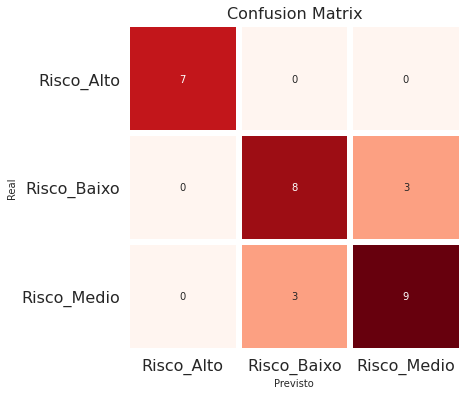

In [87]:
cm = confusion_matrix(y_test, y_pred)

df1 = pd.DataFrame(columns=["Risco_Alto","Risco_Baixo", "Risco_Medio"], index= ["Risco_Alto","Risco_Baixo", "Risco_Medio"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True, cmap="Reds", fmt= '.0f',ax=ax,linewidths = 5, cbar = False)
plt.xlabel("Previsto")
plt.xticks(size = 16)
plt.yticks(size = 16, rotation = 0)
plt.ylabel("Real")
plt.title("Confusion Matrix", size = 16)
plt.show()

### 2° Versão da Máquina Preditiva: Máquina Definitiva 

In [88]:
# Importando a Biblioteca do SVM
from sklearn.svm import SVC
classifier = SVC(kernel='linear',             # ['linear', 'rbf']
                 gamma= 1e-5  ,               # [1e-1, 1e-2, 1e-3, 1e-5]
                 C=10,                        # [10.0, 100.0, 1000.0, 10000.0]
                 random_state=7)




In [89]:
#Treinando a Máquina com o SVC
classifier.fit(X_train,y_train)



SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='linear',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

In [90]:
#Fazendo novas previsões com os dados de teste
y_pred = classifier.predict(X_test)

print("\n---------------------------\n")
print("Predicted Values for Test Set :\n",y_pred)
print("\n---------------------------\n")
print("Actual Values for Test Set :\n",y_test)


---------------------------

Predicted Values for Test Set :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Baixo' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']

---------------------------

Actual Values for Test Set :
 ['Risco_Baixo' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio' 'Risco_Baixo'
 'Risco_Alto' 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Medio'
 'Risco_Medio' 'Risco_Medio' 'Risco_Alto' 'Risco_Baixo' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo' 'Risco_Alto' 'Risco_Alto'
 'Risco_Medio' 'Risco_Baixo' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo'
 'Risco_Baixo' 'Risco_Medio' 'Risco_Medio' 'Risco_Baixo' 'Risco_Baixo']


In [91]:
#Imprimindo os hyperparâmetros utilizados na criação da Maquina Preditiva Definitiva
classifier

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='linear',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

In [92]:
# Calculando a Acurácia da Máquina Preditiva
from sklearn import metrics
print("Prediction Accuracy = ", metrics.accuracy_score(y_test, y_pred))

# Comparando valores Reais com Preditos pela Máquina
print("\nActual vs Predicted  \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : y_test,
                         "Predicted" : y_pred})

error_df.head(5)

Prediction Accuracy =  0.9333333333333333

Actual vs Predicted  
------------------------------



,Actual,Predicted
0,Risco_Baixo,Risco_Baixo
1,Risco_Medio,Risco_Medio
2,Risco_Alto,Risco_Alto
3,Risco_Medio,Risco_Medio
4,Risco_Baixo,Risco_Baixo


In [93]:

#Usando a confusion matrix e o classification report para avaliar a Máquina
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test, y_pred)

In [94]:
# Imprimindo a Confusion Matrix e o Classification Report
print(cm)
print(cr)

[[ 7  0  0]
 [ 0 11  0]
 [ 0  2 10]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         7
 Risco_Baixo       0.85      1.00      0.92        11
 Risco_Medio       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



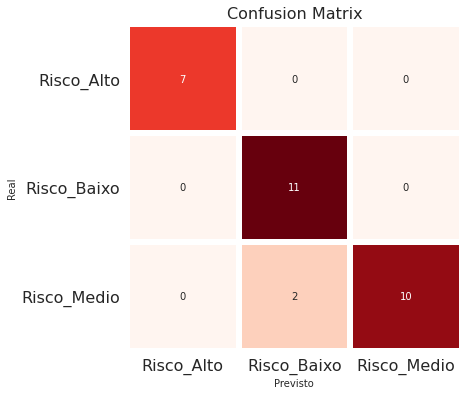

In [95]:
cm = confusion_matrix(y_test, y_pred)

df1 = pd.DataFrame(columns=["Risco_Alto","Risco_Baixo", "Risco_Medio"], index= ["Risco_Alto","Risco_Baixo", "Risco_Medio"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True, cmap="Reds", fmt= '.0f',ax=ax,linewidths = 5, cbar = False)
plt.xlabel("Previsto")
plt.xticks(size = 16)
plt.yticks(size = 16, rotation = 0)
plt.ylabel("Real")
plt.title("Confusion Matrix", size = 16)
plt.show()

# Fim

![alt text](https://miro.medium.com/max/625/1*XBWI6eNVLS_70s1qS46E1w.gif)

### Conecte-se comigo:

<p align="left">
<a href="https://linkedin.com/in/rodrigo-lopes-de-andrade-51753246" target="blank"><img align="center" src="https://raw.githubusercontent.com/rahuldkjain/github-profile-readme-generator/master/src/images/icons/Social/linked-in-alt.svg" alt="rodrigo-lopes-de-andrade-51753246" height="30" width="40" /></a>
<a href="https://instagram.com/rodrigo.lopesandrade" target="blank"><img align="center" src="https://raw.githubusercontent.com/rahuldkjain/github-profile-readme-generator/master/src/images/icons/Social/instagram.svg" alt="rodrigo.lopesandrade" height="30" width="40" /></a>
<a href="https://medium.com/rodrigo-lopesandrade" target="blank"><img align="center" src="https://raw.githubusercontent.com/rahuldkjain/github-profile-readme-generator/master/src/images/icons/Social/medium.svg" alt="rodrigo-lopesandrade" height="30" width="40" /></a>
</p>